In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import GradCam

In [2]:
# Load own model
model = keras.models.load_model('models/bird_classifier_xception_100eps/')


In [3]:
# Get relevant layers
model.summary()
model_1 = model.get_layer("xception")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 226)              

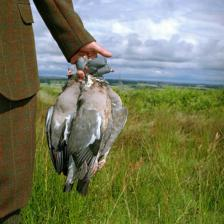

In [58]:

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

# last_conv_layer_name = 'global_average_pooling2d_3'
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    'global_average_pooling2d_3',
    'dense_9',
    'dense_10',
    'dense_11'
#     "avg_pool",
#     "predictions",
]

# The local path to our target image
# img_path = keras.utils.get_file(
#     "african_elephant.jpg", " https://i.imgur.com/Bvro0YD.png"
# )

# keras.utils.get_file('data/test/PIGEON/pigeon_810.jpeg', "")
img_name = 'pigeon_810.jpeg'
img_path = 'data/test/PIGEON/'
display(Image(img_path + img_name))

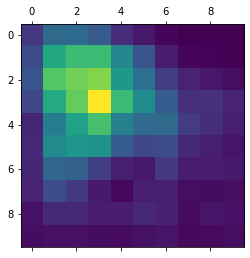

In [59]:
# Prepare image
img_array = preprocess_input(GradCam.get_img_array(img_path + img_name, size=img_size))

# Make model
# model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = GradCam.make_gradcam_heatmap(
    img_array, model, model_1, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()


grad_cam_images/pigeon_810.jpeg


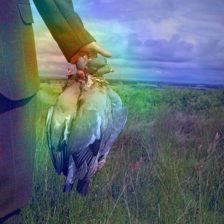

In [60]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path + img_name)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "grad_cam_images/" + img_name
print(save_path)
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))